In [1]:
import pandas as pd 

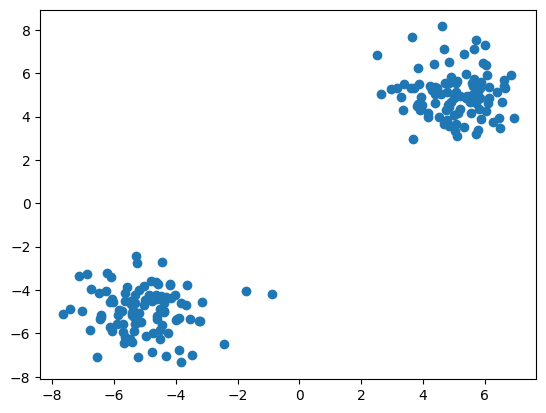

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]
X,y = make_blobs(n_samples=200,centers=centroids,cluster_std=cluster_std,n_features=2,random_state=2)
plt.scatter(X[:,0],X[:,1])

In [3]:
df = pd.DataFrame(X)
df

,0,1
0,5.931887,6.468332
1,6.383781,5.148349
2,-5.189469,-5.077219
3,-5.114421,-5.498174
4,3.900703,4.318469
...,...,...
195,3.285933,4.923360
196,6.451170,3.935072
197,-4.999990,-4.457647
198,3.389501,5.499940


In [4]:
import random
import numpy as np

In [5]:


X[1]-X[2]

array([11.5732503 , 10.22556791])

In [93]:
class KMeansCluster:
    def __init__(self):
        self.X=None
        self.cetroids =None
    def fit(self,X):
        self.X = X
        self.centroids = self.pick_random_centroids(2)

    def pick_random_centroids(self,k):
        centroids = []
        for i in range(k):
            centroids.append(random.randint(0,len(self.X)-1))
        return [self.X[centroids[0]],self.X[centroids[1]]]
    
    def calculate_euclidean_distance(self,val,cen):
        distance = np.sqrt((val[0]-cen[0])**2 + (val[1]-cen[1])**2)
        return distance
    def decide_cluster(self,i,c):
        if c[0][i]<c[1][i]:
            return 1
        else:
            return 2
    def loop_for_distance(self,c,centroids):
        for i in range(len(self.X)):
            for j in range(len(centroids)):
                c[j][i] = self.calculate_euclidean_distance(self.X[i],centroids[j])
        return c
    def assign_cluster(self,centroids):
        c = np.zeros((2, len(self.X)))
        print("centroids",centroids)
        c = self.loop_for_distance(c,centroids)
        for i in range(len(self.X)):
            df.loc[i,"cluter_id"] = self.decide_cluster(i,c)
        r=self.move_centroids(centroids[0],centroids[1],c)
        if r ==0:
            print("success")
        

        



    def move_centroids(self,centroid1,centroid2,c):
        c1_distances=c[0]
        c2_distances = c[1]

        print("c old : ",c1_distances[0])
        a=np.mean(c1_distances[0])
        b=np.mean(c1_distances[1])
        new_centroid1 = [a,b]
        a=np.mean(c2_distances[0])
        b=np.mean(c2_distances[1])
        new_centroid2 = [a,b]
        print("old1",centroid1)
        print("new1 inside fun",new_centroid1)
        if (centroid1[0] != new_centroid1[0] and centroid1[1] != new_centroid1[1]) or (centroid2[0] != new_centroid2[0] and centroid2[1] != new_centroid2[1]):
            print("centroids moved---------------------------------------")
            c = self.loop_for_distance(c,[new_centroid1,new_centroid2])
            print("newc",c[0][0])
            print([new_centroid1,new_centroid2])
            # print("changed--------------------------------------")
            for i in range(len(self.X)):
                df.loc[i,"cluter_id"] = self.decide_cluster(i,c)
                # 
                # return 0
            c=self.move_centroids(new_centroid1,new_centroid2,c)
        else:
            return 0



           

    

        



            
        

[3, 2]
centroids [array([5, 6]), array([3, 4])]
Centroids moved to [array([6., 7.]), array([2., 3.])]
centroids [array([6., 7.]), array([2., 3.])]
Converged


In [94]:
obj = KMeansCluster()
# centroids = obj.pick_random_centroids()
# obj.assign_cluster(centroids)
obj.fit(X)

[2, 0]
centroids [array([3, 4]), array([1, 2])]
Centroids moved to [array([5., 6.]), array([1.5, 2.5])]
centroids [array([5., 6.]), array([1.5, 2.5])]
Centroids moved to [array([6., 7.]), array([2., 3.])]
centroids [array([6., 7.]), array([2., 3.])]
Converged


In [ ]:
import numpy as np
import pandas as pd
import random

class KMeansCluster:
    def __init__(self, X):
        self.X = X
        self.df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

    def pick_random_centroids(self):
        centroids = []
        for i in range(2):
            centroids.append(random.randint(0, len(self.X) - 1))
        print(centroids)
        return [self.X[centroids[0]], self.X[centroids[1]]]

    def calculate_euclidean_distance(self, val, cen):
        distance = np.sqrt((val[0] - cen[0]) ** 2 + (val[1] - cen[1]) ** 2)
        return distance

    def decide_cluster(self, i, c):
        if c[0][i] < c[1][i]:
            return 1
        else:
            return 2

    def loop_for_distance(self, c, centroids):
        for i in range(len(self.X)):
            for j in range(len(centroids)):
                c[j][i] = self.calculate_euclidean_distance(self.X[i], centroids[j])
        return c

    def assign_cluster(self, centroids):
        c = np.zeros((2, len(self.X)))
        print("centroids", centroids)
        c = self.loop_for_distance(c, centroids)
        for i in range(len(self.X)):
            self.df.loc[i, "cluster_id"] = self.decide_cluster(i, c)
        self.move_centroids(centroids, c)

    def move_centroids(self, centroids, c):
        new_centroids = []
        for cluster_id in range(2):
            cluster_points = self.df[self.df['cluster_id'] == cluster_id + 1][['Feature1', 'Feature2']].values
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                new_centroids.append(centroids[cluster_id])

        if not np.array_equal(centroids, new_centroids):
            print("Centroids moved to", new_centroids)
            self.assign_cluster(new_centroids)
        else:
            print("Converged")
            return 0

# Example usage:
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])  # Example dataset
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
obj = KMeansCluster(X)
initial_centroids = obj.pick_random_centroids()
obj.assign_cluster(initial_centroids)
